## Practical 8_1
## Ньяти Каелиле БВТ2201

### Exercise 1

In [385]:
import numpy as np
import random

n= 100
lambd= 0.01

def invFunc(p, lambd):   
    result= (-1/lambd) * np.log(p)
    return result


def Num(n, lambd):
    exp_Num = []

    for _ in range(n):
        p= random.uniform(0,1)
        N = invFunc(p, lambd)
        exp_Num.append(N)

    return exp_Num



### Exercise 2

Histogram


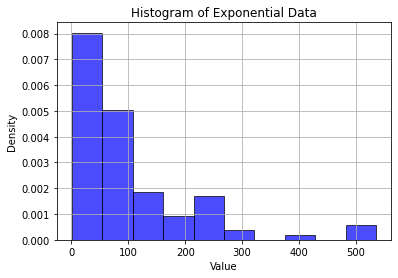

In [386]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=10, title="Histogram of Exponential Data"):
    """
    Plot a histogram of the given data.
    """
    plt.hist(data, bins=bins, density=True, color="blue", edgecolor="black", alpha=0.7)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.grid()
    plt.show()

print("Histogram")
data = Num(n, lambd)
plot_histogram(data)


### Exercise 3

In [387]:
def extract_hist_coord(data, bins=10):
    counts, edges = np.histogram(data, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:])/2 # computing bin centers (midpoints)

    return centers, counts

center, counts = extract_hist_coord(data)
print(f"Center: {center} and Counts: {counts}")

Center: [ 27.30144629  80.80685713 134.31226797 187.81767882 241.32308966
 294.8285005  348.33391134 401.83932219 455.34473303 508.85014387] and Counts: [0.00803657 0.00504622 0.00186897 0.00093448 0.00168207 0.00037379
 0.         0.0001869  0.         0.00056069]


### Exercise 4

In [388]:
# Function to compute b0 and b1 based on the regression formulas
def calculate_b0_b1(x, y):
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x ** 2)
    sum_xy = np.sum(x * y)
    n = len(x)

    b0 = (sum_y * sum_x2 - (sum_xy * sum_x)) / (n*sum_x2 - (sum_x * sum_x))  #eq 1
    b1 = (sum_y * sum_x - (n*sum_xy))/ (sum_x * sum_x - (n * sum_x2)) #eq 2

    return b0, b1

# Apply logarithm to adjusted counts
ln_counts = np.log(counts + 1e-9) #avoiding counts that are zero

b0_ex, b1_ex = calculate_b0_b1(center, ln_counts)
print(f"b0_ex= {b0_ex} and b1_ex= {b1_ex}")

b1_true = -b1_ex  # Ensure b1 matches the expected negative slope


error = abs(b1_true - lambd)
print(f"Error in lambda estimation: {error}")

b0_ex= -3.8609125866402643 and b1_ex= -0.021098127565507562
Error in lambda estimation: 0.011098127565507562


### Additional work

In [389]:
"""
# Calculate correlation coefficient r
x_mean = np.mean(center)
y_mean = np.mean(counts)

Sx = np.sum((center - x_mean)**2)/n
Sy = np.sum((counts - y_mean)**2)/n

r = b1_ex * (Sx/Sy) #eq 3

print(f"Task 1: Coefficients")
print(f"b0 (intercept): {b0_ex:.4f}")
print(f"b1 (slope): {b1_ex:.4f}")
print(f"Correlation coefficient (r): {r:.4f}")
"""

'\n# Calculate correlation coefficient r\nx_mean = np.mean(center)\ny_mean = np.mean(counts)\n\nSx = np.sum((center - x_mean)**2)/n\nSy = np.sum((counts - y_mean)**2)/n\n\nr = b1_ex * (Sx/Sy) #eq 3\n\nprint(f"Task 1: Coefficients")\nprint(f"b0 (intercept): {b0_ex:.4f}")\nprint(f"b1 (slope): {b1_ex:.4f}")\nprint(f"Correlation coefficient (r): {r:.4f}")\n'

In [390]:
"""
#Fisher test
S2 = 0.1  # Given variance of random effects
F_calculated = D1 / S2

# Fisher critical value
alpha = 0.05
F_critical = f.ppf(1 - alpha, n - 1, n - 1)

print(f"\nTask 3: Fisher Test")
print(f"F_calculated: {F_calculated:.4f}")
print(f"F_critical: {F_critical:.4f}")
if F_calculated < F_critical:
    print("The variance D1 is not significantly different from S^2 (acceptable regression model).")
else:
    print("The variance D1 is significantly different from S^2 (model may not fit well).")
"""

'\n#Fisher test\nS2 = 0.1  # Given variance of random effects\nF_calculated = D1 / S2\n\n# Fisher critical value\nalpha = 0.05\nF_critical = f.ppf(1 - alpha, n - 1, n - 1)\n\nprint(f"\nTask 3: Fisher Test")\nprint(f"F_calculated: {F_calculated:.4f}")\nprint(f"F_critical: {F_critical:.4f}")\nif F_calculated < F_critical:\n    print("The variance D1 is not significantly different from S^2 (acceptable regression model).")\nelse:\n    print("The variance D1 is significantly different from S^2 (model may not fit well).")\n'

### Exercise 5

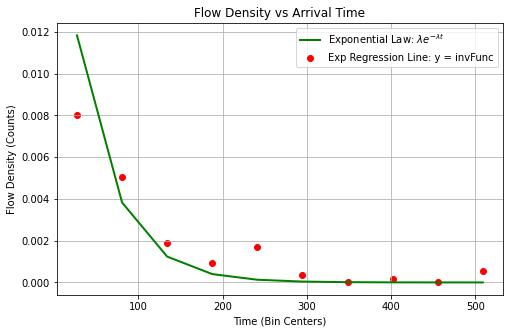

In [391]:
b1_true = -b1_ex #original formula for linear regression is y = b0 + b1x, thus b1 must be negative

ln_f_t = b0_ex - b1_true * center #linear regression equation
f_t = np.exp(ln_f_t) #exponential law

#D1 = np.sum((counts - f_t) ** 2) / (len(counts) - 1)

#print(f"\nVariance (D1): {D1:.4f}")

# Plot Flow Density vs Arrival Times
def plot_flow_density_vs_time(centers, counts, f_t):
    """
    Plot the flow density (counts) as a function of time (centers).
    """
    
    plt.figure(figsize=(8, 5))
    plt.scatter(centers, counts, label=f"Exp Regression Line: y = invFunc", color="red")
 
     # Plot the Exponential Law Curve
    plt.plot(centers, f_t, color="green", linewidth=2, label="Exponential Law: $\lambda e^{-\lambda t}$")
    
    plt.title("Flow Density vs Arrival Time")
    plt.xlabel("Time (Bin Centers)")
    plt.ylabel("Flow Density (Counts)")
    plt.grid()
    plt.legend()
    plt.show()

# Call the Function
plot_flow_density_vs_time(center, counts, f_t)

### Exercise 6


Running experiment for n = 100


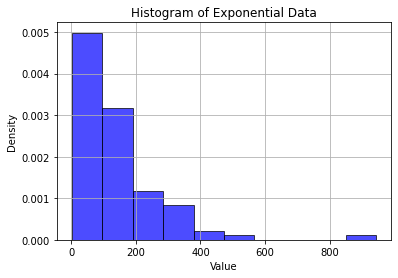

Center: [ 27.30144629  80.80685713 134.31226797 187.81767882 241.32308966
 294.8285005  348.33391134 401.83932219 455.34473303 508.85014387] and Counts: [0.0049846  0.00318166 0.00116661 0.00084844 0.00021211 0.00010606
 0.         0.         0.         0.00010606]
b0_ex= -3.7554950351152256 and b1_ex= -0.016130453522365702
Error in lambda estimation: 0.006130453522365702


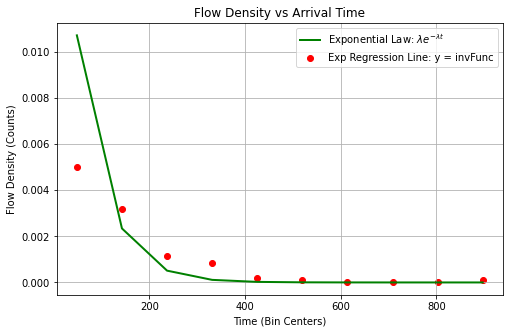


Running experiment for n = 300


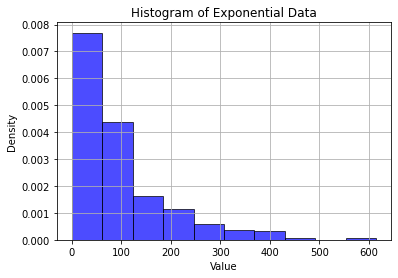

Center: [ 27.30144629  80.80685713 134.31226797 187.81767882 241.32308966
 294.8285005  348.33391134 401.83932219 455.34473303 508.85014387] and Counts: [7.69504122e-03 4.38942492e-03 1.62571293e-03 1.13799905e-03
 5.96094742e-04 3.79333018e-04 3.25142587e-04 5.41904311e-05
 0.00000000e+00 5.41904311e-05]
b0_ex= -3.4791643585586294 and b1_ex= -0.017033668936902606
Error in lambda estimation: 0.007033668936902606


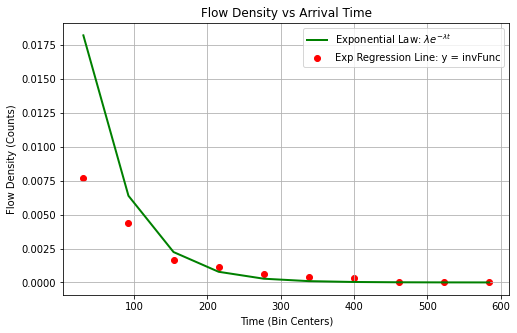


Running experiment for n = 500


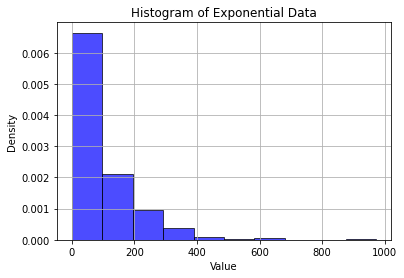

Center: [ 27.30144629  80.80685713 134.31226797 187.81767882 241.32308966
 294.8285005  348.33391134 401.83932219 455.34473303 508.85014387] and Counts: [6.64480208e-03 2.09835855e-03 9.66890705e-04 3.90870711e-04
 8.22885707e-05 2.05721427e-05 6.17164280e-05 0.00000000e+00
 0.00000000e+00 2.05721427e-05]
b0_ex= -3.8472432332556257 and b1_ex= -0.014321203966401127
Error in lambda estimation: 0.004321203966401127


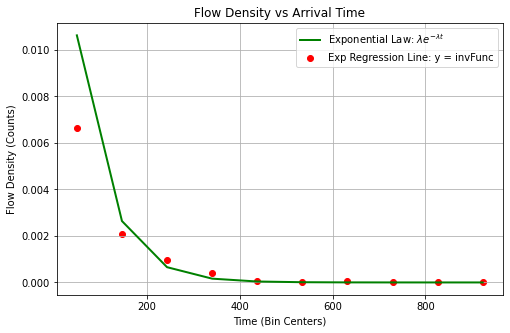


Running experiment for n = 1000


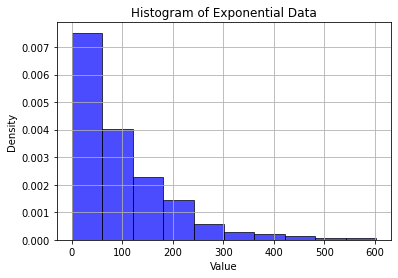

Center: [ 27.30144629  80.80685713 134.31226797 187.81767882 241.32308966
 294.8285005  348.33391134 401.83932219 455.34473303 508.85014387] and Counts: [7.51832890e-03 4.03301087e-03 2.29035185e-03 1.46051422e-03
 5.64289586e-04 2.82144793e-04 1.99161030e-04 1.32774020e-04
 4.97902576e-05 6.63870102e-05]
b0_ex= -4.707927625464356 and b1_ex= -0.009478928312491464
Error in lambda estimation: 0.0005210716875085359


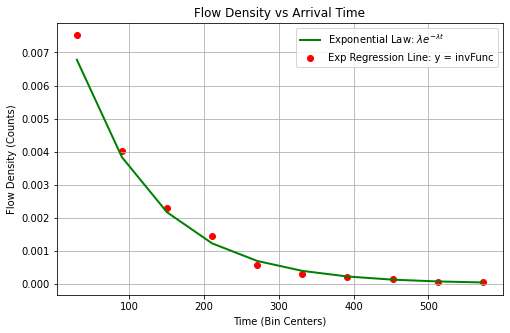

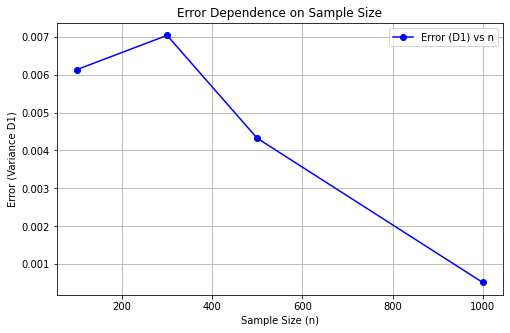

In [392]:
# Main experiment function
def experiment(lambd, n_values, bins=10):
    errors = []

    for n in n_values:
        print(f"\nRunning experiment for n = {n}")
        data = Num(n, lambd)
        
        # Plot histogram
        plot_histogram(data)
        
        # Extract histogram coordinates
        centers, counts = extract_hist_coord(data)
        print(f"Center: {center} and Counts: {counts}")
        
        #ln_counts = np.log(counts)
        ln_counts = np.log(counts + 1e-9) 
        
        # Calculate regression parameters
        b0_ex, b1_ex = calculate_b0_b1(centers, ln_counts)
        print(f"b0_ex= {b0_ex} and b1_ex= {b1_ex}")

        b1_true = -b1_ex  # Ensure b1 matches the expected negative slope

        error = abs(b1_true - lambd)
        errors.append(error)
        print(f"Error in lambda estimation: {error}")

        
        
        # Generate the fitted exponential curve
        ln_f_t = b0_ex - b1_true * centers
        f_t = np.exp(ln_f_t)
        
        # Calculate variance
        #D1 = np.sum((counts - f_t) ** 2) / (len(counts) - 1)
        #print(f"Variance (D1)= {D1:.4f}")
        
        # Plot flow density vs time
        plot_flow_density_vs_time(centers, counts, f_t)

     # Plot error dependence on sample size
    plt.figure(figsize=(8, 5))
    plt.plot(n_values, errors, marker="o", linestyle="-", color="blue", label="Error (D1) vs n")
    plt.title("Error Dependence on Sample Size")
    plt.xlabel("Sample Size (n)")
    plt.ylabel("Error (Variance D1)")
    plt.grid()
    plt.legend()
    plt.show()

# Run experiments for different n values
n_values = [100, 300, 500, 1000]
lambd = 0.01
experiment(lambd, n_values)